In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
dataframe = pd.read_csv("/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/archive/fashion-mnist_train.csv")

In [3]:
dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


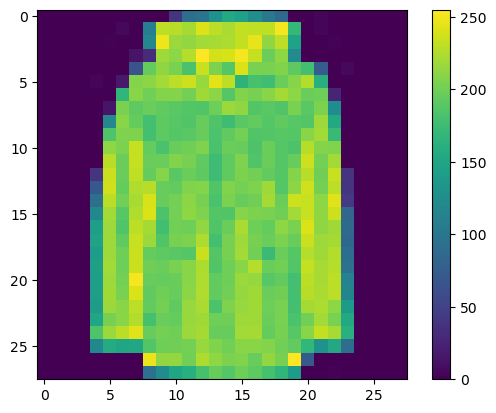

In [5]:
plt.figure()
plt.imshow(dataframe.iloc[59, 1:].values.reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
dataframe.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
X = np.array(dataframe.iloc[: , 1:])
y = np.array(dataframe.iloc[: , 0])

In [8]:
y

array([2, 9, 6, ..., 8, 8, 7])

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
learning_rate = 0.01
epochs = 5


In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [12]:
input_size = X.shape[1]
weights = np.random.rand(input_size) * 0.01
bias = 0.0

In [13]:
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        y_true = y[i]
        z = np.dot(x, weights) + bias
        prediction = sigmoid(z)
        error = y_true - prediction
        gradient = error * sigmoid_derivative(prediction)
        weights += learning_rate * gradient * x
        bias += learning_rate * gradient

In [14]:
predictions = [1 if sigmoid(np.dot(x, weights) + bias) > 0.5 else 0 for x in X]
accuracy = np.mean(predictions == y)
print(f"Training accuracy: {accuracy:.4f}")

Training accuracy: 0.1000


In [15]:
test_dataframe = pd.read_csv("/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/archive/fashion-mnist_test.csv")
X_test = np.array(test_dataframe.iloc[:, 1:])
y_test = np.array(test_dataframe.iloc[:, 0])

In [16]:
test_predictions = [1 if sigmoid(np.dot(x, weights) + bias) > 0.5 else 0 for x in X_test]
test_accuracy = np.mean(test_predictions == y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.1000
